### Import Library
Untuk memudahkan analisis dan pengolahan data. Dengan melakukan import library, kita dapat menggunakan/mengakses fungsi yang telah tersedia tanpa perlu membuatnya dari nol. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, CondensedNearestNeighbour
from sklearn.preprocessing import RobustScaler, MinMaxScaler

### Membaca File CSV
Dapat dilakukan dengan menggunakan fungsi `pd.read_csv()`

In [5]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


### Pre-Proccessing

In [6]:
data.isna().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [7]:
(data.isna().sum()/len(data)) * 100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

### 1. Imputasi Missing Value dengan Mean, Median, Modus

Imputasi missing value adalah teknik untuk menangani data yang hilang (missing values) dengan mengganti nilai yang hilang dengan nilai tertentu, sehingga model machine learning atau analisis statistik dapat berjalan tanpa masalah. Tiga metode yang umum digunakan untuk melakukan imputasi adalah menggunakan mean, median, dan modus.

In [8]:
imputasi = data.select_dtypes(include=[np.number])

Imputasi data dengan nilai mean: Metode ini menggantikan nilai yang hilang dengan rata-rata (mean) dari seluruh nilai pada kolom tersebut.

In [9]:
data_mean = imputasi.fillna(imputasi.mean())

In [10]:
data_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1


Imputasi data dengan nilai median: Metode ini mengganti nilai yang hilang dengan median, yaitu nilai tengah dari distribusi data ketika diurutkan.

In [12]:
data_median = imputasi.fillna(imputasi.median())

In [13]:
data_median.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


Imputasi data dengan nilai modus: Metode ini menggantikan nilai yang hilang dengan modus, yaitu nilai yang paling sering muncul dalam kolom.

In [15]:
data_modus = SimpleImputer(
        missing_values=np.nan,
        strategy='most_frequent')

data_modus = pd.DataFrame(data_modus.fit_transform(data), columns=data.columns)

In [16]:
data_modus.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data_modus.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1.0
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1.0


### EDA

### 2. Cek Korelasi Antar Variabel dengan Heatmap

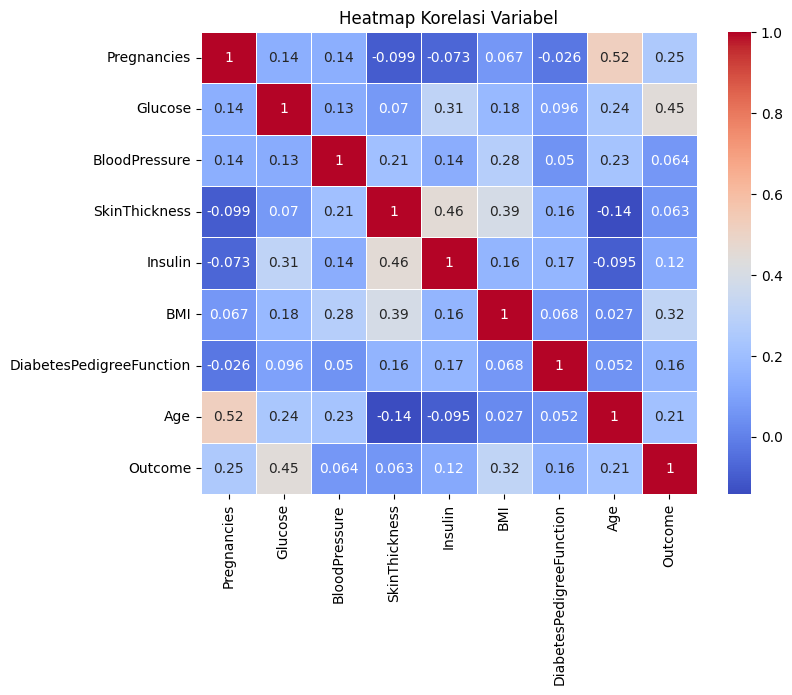

In [18]:
correlation_matrix = data.corr()

# Menampilkan heatmap menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Variabel')

# Menampilkan heatmap
plt.show()

Berdasarkan heatmap tersebut, dapat dilihat hubungan antar variabel pada dataset `diabetes.csv` terutama variabel target `Outcome`. Pengukuran korelasi ini dapat dijelaskan sebagai berikut,
- Nilai 1 berarti ada korelasi positif sempurna (ketika satu variabel meningkat, variabel lain juga meningkat).
- Nilai -1 berarti ada korelasi negatif sempurna (ketika satu variabel meningkat, variabel lain menurun).
- Nilai 0 berarti tidak ada hubungan linear yang jelas antara kedua variabel.

Analisis yang dapat dijelaskan yaitu,
- Variabel `Glucose`: Memiliki korelasi tertinggi dengan variabel Outcome sebesar 0.45. Artinya, semakin tinggi kadar glukosa seseorang, semakin besar kemungkinan orang tersebut terkena diabetes.
- Variabel `BMI`: Memiliki korelasi yang signifikan dengan `Outcome`, yaitu sebesar 0.32. Ini menunjukkan bahwa semakin tinggi Body Mass Index (BMI), semakin tinggi kemungkinan terkena diabetes.
- Variabel `Age`: Korelasi dengan `Outcome` sebesar 0.21. Artinya, semakin tua usia seseorang, ada peningkatan risiko terkena diabetes, meskipun pengaruhnya tidak terlalu kuat dibandingkan variabel lainnya.
- Variabel `Pregnancies`: Korelasi sebesar 0.25 dengan `Outcome`. Ini menunjukkan bahwa jumlah kehamilan memiliki hubungan yang cukup kuat dengan kemungkinan terkena diabetes.
- Variabel `Insulin`: Korelasinya dengan `Outcome` relatif rendah, yaitu sekitar 0.12. Artinya, insulin memiliki pengaruh kecil dalam menentukan apakah seseorang terkena diabetes berdasarkan data ini.
- Variabel `BloodPressure`, `SkinThickness`, `DiabetesPedigreeFunction`: Variabel-variabel ini memiliki korelasi yang sangat rendah dengan `Outcome` (di bawah 0.1), yang berarti hubungan mereka dengan kemungkinan terkena diabetes sangat kecil atau hampir tidak ada.

Berdasarkan analisis yang sudah dijelaskan dapat ditarik kesimpulan bahwa variabel yang paling berpengaruh terhadap `Outcome` (diabetes) dalam dataset ini adalah `Glucose`, diikuti oleh `BMI`, `Pregnancies`, dan `Age`. Variabel seperti `BloodPressure`, `SkinThickness`, dan `DiabetesPedigreeFunction` memiliki hubungan yang lemah terhadap kemungkinan terkena diabetes.

### 3. Lakukan Imbalance Handling dengan Undersampling

`Imbalance Handling` adalah teknik-teknik yang digunakan untuk menangani ketidakseimbangan kelas dalam dataset agar model machine learning tidak bias terhadap kelas mayoritas. Ada beberapa cara yang dapat dilakukan untuk menangani ketidakseimbangan kelas yaitu, resampling (oversampling dan undersampling), algoritma SMOTE, modifikasi algoritma (Random Forest, XGBoost), dan Cost-sensitive learning.

`Undersampling` adalah salah satu metode untuk menangani ketidakseimbangan kelas dengan mengurangi jumlah sampel dari kelas mayoritas. Undersampling dilakukan dengan secara acak memilih subset dari kelas mayoritas sehingga jumlahnya menjadi seimbang dengan kelas minoritas.

In [33]:
# Menggunakan imputasi median
x_median=data_median.drop('Outcome', axis=1)
y_median=data_median['Outcome']

# Undersampling dengan metode RandomUnderSampler
random = RandomUnderSampler(sampling_strategy='not minority', random_state=42) #semua class kecuali minority
x_resampled_median, y_resampled_median = random.fit_resample(x_median, y_median)

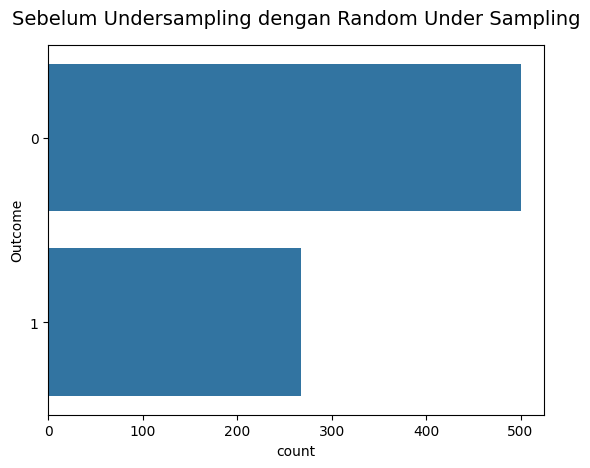

In [34]:
sns.countplot(data=data_median, y=y_median)
plt.title("Sebelum Undersampling dengan Random Under Sampling", fontsize=14, pad=15)
plt.show()

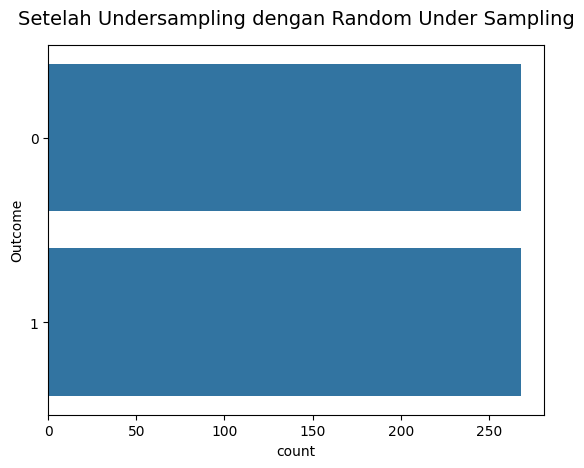

In [35]:
sns.countplot(data=x_resampled_median, y=y_resampled_median)
plt.title("Setelah Undersampling dengan Random Under Sampling", fontsize=14, pad=15)
plt.show()

### 4. Lakukan Scaling dengan Robust Scaler dan MinMax

`Scaling` adalah proses mengubah skala atau rentang nilai data agar lebih sesuai dan konsisten untuk digunakan dalam algoritma tertentu. Ada beberapa teknik yang dapat dilakukan untuk scaling, 2 diantaranya adalah robust scaler dan minmax scaler. 

`Robust Scaler`: Teknik ini lebih tahan terhadap outliers (nilai yang sangat besar atau kecil dibandingkan dengan data lain). Robust Scaler melakukan scaling berdasarkan interquartile range (IQR), yaitu jarak antara kuartil ke-1 (Q1) dan kuartil ke-3 (Q3), sehingga tidak dipengaruhi oleh nilai ekstrem.

In [25]:
scaler = RobustScaler()
data_robust_mean = x_resampled_mean.copy()
data_robust_mean[data_robust_mean.columns.difference(['Outcome'])] = scaler.fit_transform(data_robust_mean[data_robust_mean.columns.difference(['Outcome'])])

In [26]:
print(data_robust_mean.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
117     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
572    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   
251    -0.360637  0.258713       1.253393       -0.68750 -0.807123 -0.974068   
161     0.639363 -0.559469       0.420060        0.56250  0.000000  1.269834   

     DiabetesPedigreeFunction       Age  
556                 -0.590302 -0.263844  
117                  0.635278 -0.680510  
572                  0.005622 -0.930510  
251                 -0.404779 -0.513844  
161                 -0.629656  0.000000  


`MinMax Scaler`: Salah satu metode scaling yang digunakan untuk mengubah rentang data menjadi skala tertentu, biasanya antara 0 dan 1. Teknik ini menghitung nilai minimum dan maksimum dari setiap fitur, lalu menyesuaikan semua nilai dalam rentang tersebut.

In [27]:
scaler = MinMaxScaler()
data_minmax_mean = x_resampled_mean.copy()
data_minmax_mean[data_minmax_mean.columns.difference(['Outcome'])] = scaler.fit_transform(data_minmax_mean[data_minmax_mean.columns.difference(['Outcome'])])

In [28]:
print(data_minmax_mean.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
117     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
572     0.176471  0.557789       0.508772       0.313131  0.081031  0.439642   
251     0.117647  0.648241       0.736842       0.000000  0.000000  0.417288   
161     0.411765  0.512563       0.649123       0.404040  0.141581  0.554396   

     DiabetesPedigreeFunction       Age  
556                  0.059688  0.176471  
117                  0.253898  0.078431  
572                  0.154120  0.019608  
251                  0.089087  0.117647  
161                  0.053452  0.238551  
